In [1]:
#Final Project#
#Jace Vayhinger & Thomas Reed#

In [2]:
import scipy as sp
import numpy as np #linear algebra#
import pandas as pd #used for importing the dataset#
import seaborn as sns #used in data analysis#
import matplotlib.pyplot as plt #used in data analysis#

In [3]:
df = pd.read_csv(r"C:/Users/13177/OneDrive/Info Infr/amazon.csv",encoding = 'latin1')
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
df.info

<bound method DataFrame.info of       year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]>

In [5]:
#translate the months to english using .replace()#
df['month'] = df['month'].replace('Janeiro','Jan')
df['month'] = df['month'].replace('Fevereiro','Feb')
df['month'] = df['month'].replace('Março','Mar')
df['month'] = df['month'].replace('Abril','Apr')
df['month'] = df['month'].replace('Maio','May')
df['month'] = df['month'].replace('Junho','Jun')
df['month'] = df['month'].replace('Julho','Jul')
df['month'] = df['month'].replace('Agosto','Aug')
df['month'] = df['month'].replace('Setembro','Sep')
df['month'] = df['month'].replace('Outubro','Oct')
df['month'] = df['month'].replace('Novembro','Nov')
df['month'] = df['month'].replace('Dezembro','Dec')

In [6]:
#print df again to check if translation worked#
df

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dec,128.0,2012-01-01
6450,2013,Tocantins,Dec,85.0,2013-01-01
6451,2014,Tocantins,Dec,223.0,2014-01-01
6452,2015,Tocantins,Dec,373.0,2015-01-01


.replace() worked and our dataframe is now translated!

In [7]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [8]:
df.value_counts()

year  state  month  number  date      
1998  Rio    Apr    0.0     1998-01-01    3
             Jan    0.0     1998-01-01    3
             Feb    0.0     1998-01-01    3
             Mar    0.0     1998-01-01    3
             May    0.0     1998-01-01    3
                                         ..
2011  Goias  Feb    45.0    2011-01-01    1
             Jan    39.0    2011-01-01    1
             Jul    607.0   2011-01-01    1
             Jun    314.0   2011-01-01    1
1998  Acre   Apr    0.0     1998-01-01    1
Length: 6422, dtype: int64

In [9]:
#seeing if there are any null data points#
df.isnull().sum()
#.sum() compresses everything so we dont have to look at the whole dataframe and each individual cell to see if it says False.#
#It adds everything up so it is easy to see.#

year      0
state     0
month     0
number    0
date      0
dtype: int64

We can see the dataset is free of null values!

In [10]:
#for example this is without .sum()#
df.isnull()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


In [11]:
#As we can see it is very messy and not efficient!#

Now to data analysis and visualization!

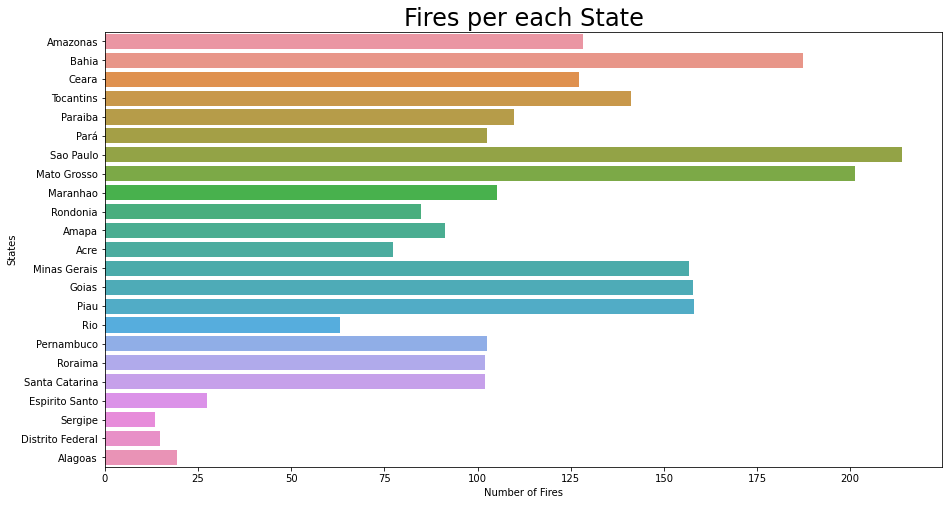

In [12]:
#exploritory data analysis showing the states and the amount of fires#
#setting the figure size#
fig, ax = plt.subplots(figsize=(15,8))
#using seaborn#
sns.barplot(data= df.sort_values(by='number', ascending=False), x = 'number', y= 'state', ci=None, ax=ax)
#graph customization#
plt.title('Fires per each State', fontdict={'fontsize':24})
plt.ylabel('States')
plt.xlabel('Number of Fires')
plt.show()

Lets see which states are responsible for the most fires.

In [13]:
#creating a new dataframe for the top 10 visual#
top10 = df.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10).reset_index()
#telling it to sort by ascending values#
top10 = top10.sort_values(by = 'number', ascending = True)
#printing the new dataframe#
top10

,state,number
9,Amazonas,30650.129
8,Tocantins,33707.885
7,Minas Gerais,37475.258
6,Goias,37695.520
5,Piau,37803.747
4,Bahia,44746.226
3,Rio,45160.865
2,Sao Paulo,51121.198
1,Paraiba,52435.918
0,Mato Grosso,96246.028


Text(0, 0.5, 'Total Wildfires during Dates')

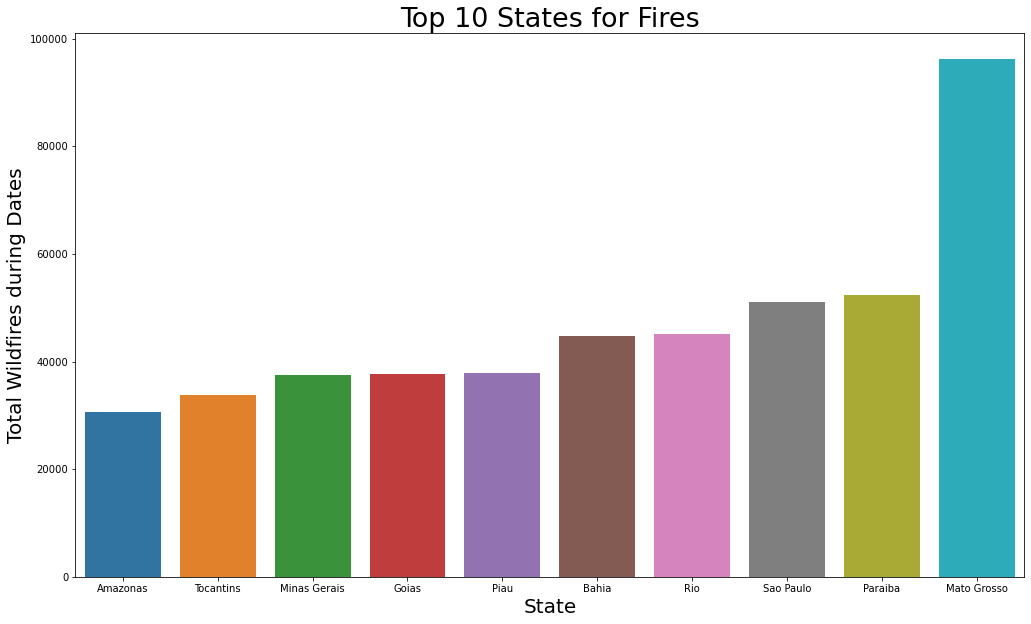

In [14]:
#now that we have our new dataframe we can use matplotlib to get some graphs out of it#
#using matplotlib to create a barplot of the top10 dataframe#
#represents the total number of fires in top 10 states from 1998-2017#
plt.figure(figsize = (17, 10))
#using seaborn and setting what the x and y axis are#
graph_10 = sns.barplot(x = top10['state'], y = top10['number'])
#grap customization#
plt.title("Top 10 States for Fires", fontsize = 27)
plt.xlabel("State", fontsize = 20)
plt.ylabel("Total Wildfires during Dates", fontsize = 20)


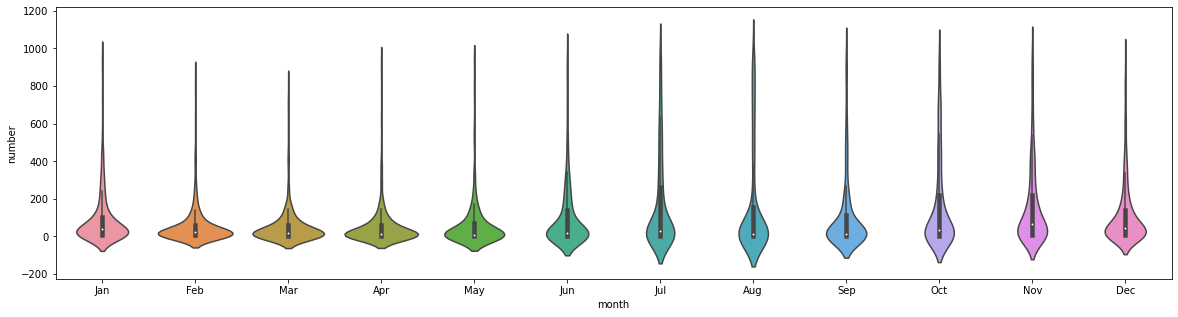

In [15]:
#violin plot using seaborn#
#setting figure size#
violin=plt.figure(figsize=(20,5))
#using seaborn, setting x and y axis#
sns.violinplot(x="month",y="number",data=df)
plt.show()

In [16]:
#find total number of forest fires during the collection of data#
#using .sum() again#
print("The total number of fires reported in the 19 years of data collection:", df['number'].sum(), "thousand.") 

The total number of fires reported in the 19 years of data collection: 698924.073 thousand.


That's a lot of wildfires!!!

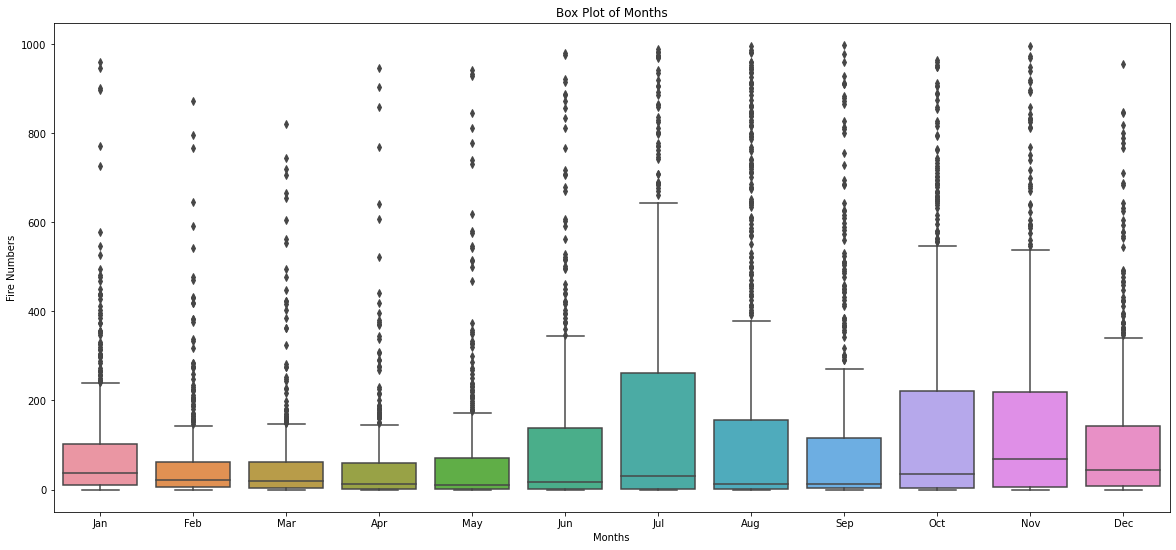

In [17]:
#lets see how this data looks as a box plot#
#setting figure size#
plt.figure(figsize=(20,9))
#using seaborns boxplot function, setting x and y axis#
sns.boxplot(x='month',y='number',data=df)
#graph customization#
plt.title('Box Plot of Months')
plt.ylabel('Fire Numbers')
plt.xlabel('Months')
plt.show()

In [18]:
#Researched that a 3rd degree polynomial fitted on the data would be best to see predicted path#
#creating the polynomial#
df_bestfit = df.groupby(['year'], as_index=False).sum()
#using numpy for linear algebra#
p = np.polyfit(df_bestfit['year'],df_bestfit['number'],3)
z = np.poly1d(p)

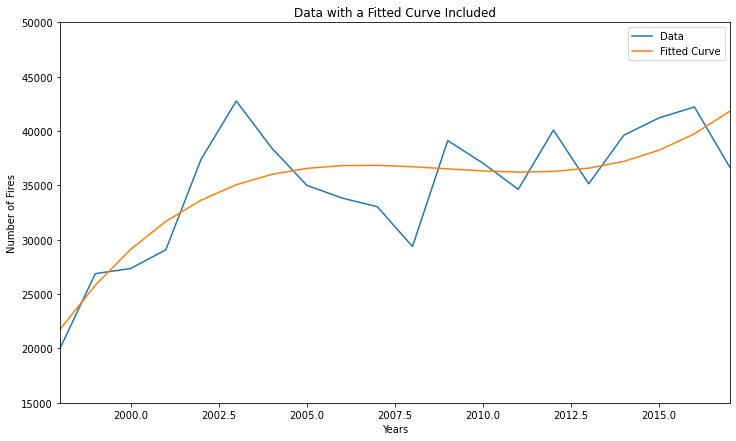

In [19]:
years = np.linspace(1998, 2017, 20)

#setting the figure size#
plt.figure(figsize=[12,7])

plt.plot(years, df_bestfit['number'], label='Data') 
plt.plot(years,z(years), label='Fitted Curve')
#setting the limits of the graph#
plt.xlim([1998, 2017])
plt.ylim([15000, 50000])
#graph customization#
plt.title('Data with a Fitted Curve Included')
plt.xlabel("Years")
plt.ylabel("Number of Fires")
plt.legend()
plt.show()

Now lets move on to using a predictive model. We will be using a random forest classifier.

Before we start, we run into an issue with the state names, so we must turn them into numbers to act as IDs. I had to research why the random forest model wasnt working and I found that I need to do this to solve the issue.

In [70]:
list_n=[]
for i in list_1:
    if df[i].dtype=='object':
        list_n.append(i)

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
#transforming the state names (strings) into int#
for i in list_n:
    df[i]=le.fit_transform(df[i])

In [73]:
df

,year,state,month,number,date
0,1998,0,4,0.0,0
1,1999,0,4,0.0,1
2,2000,0,4,0.0,2
3,2001,0,4,0.0,3
4,2002,0,4,0.0,4
...,...,...,...,...,...
6449,2012,22,2,128.0,14
6450,2013,22,2,85.0,15
6451,2014,22,2,223.0,16
6452,2015,22,2,373.0,17


In [74]:
y=df['state']
x=df[['year','month','number','date']]
#split data into train and test#
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
y_pred=rfc.predict(x_test)
#print the accuracy score#
print("Training Score:",rfc.score(x_train,y_train))

Training Score: 0.8932920079698915


As you can see our random forest model received an accuracy of 89.3%!

That is the conclusion of our notebook! We demostrated our skills of these libraries using the labs, notes, and powerpoints available to us. Hope you enjoyed!